In [2]:
from google.colab import drive
import pandas as pd
import os

# Monter Google Drive
drive.mount('/content/drive')

# Définir le chemin correct (notez le 'ML' en majuscules)
chemin = '/content/drive/MyDrive/Colab_data_projet_ML/'

# Chargement des fichiers CSV
df_1 = pd.read_csv(os.path.join(chemin, "df_final_ML2.csv"), low_memory=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nouvelle section

In [3]:
df_1

,Date,Code INSEE région,Région,Consommation (MWh),Thermique (MWh),Nucléaire (MWh),Eolien (MWh),Solaire (MWh),Hydraulique (MWh),Bioénergies (MWh),...,Semaine_de_l_année,Jour_de_la_semaine,Jour_férié,Semaine_sin,Semaine_cos,Jour_sin,Jour_cos,Mois_sin,Mois_cos,Loi energie climat 2019
0,2016-01-01,11,Île-de-France,199592.00,7386.50,0.0,191.50,27.50,235.50,3545.50,...,53,4,1,0.120537,0.992709,0.201299,0.979530,0.500000,0.866025,False
1,2016-01-01,24,Centre-Val de Loire,51985.50,1688.00,271526.5,6637.50,195.50,24.00,1190.50,...,53,4,1,0.120537,0.992709,0.201299,0.979530,0.500000,0.866025,False
2,2016-01-01,27,Bourgogne-Franche-Comté,56191.50,2677.50,0.0,2279.00,244.50,1009.00,412.00,...,53,4,1,0.120537,0.992709,0.201299,0.979530,0.500000,0.866025,False
3,2016-01-01,28,Normandie,77430.50,8127.00,152274.5,5268.50,52.50,394.00,1174.50,...,53,4,1,0.120537,0.992709,0.201299,0.979530,0.500000,0.866025,False
4,2016-01-01,32,Hauts-de-France,131545.50,12886.00,125341.0,17252.00,116.50,52.50,2965.00,...,53,4,1,0.120537,0.992709,0.201299,0.979530,0.500000,0.866025,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33559,2023-08-28,53,Bretagne,68881.00,371.75,0.0,4388.75,1892.25,890.25,0.00,...,35,0,0,-0.885456,-0.464723,-0.571268,0.820763,-0.866025,-0.500000,True
33560,2023-08-28,75,Nouvelle-Aquitaine,82677.25,1608.00,128768.5,6371.00,18697.00,1664.25,100.25,...,35,0,0,-0.885456,-0.464723,-0.571268,0.820763,-0.866025,-0.500000,True
33561,2023-08-28,76,Occitanie,99470.50,159.25,0.0,24095.75,14924.75,20911.50,4284.75,...,35,0,0,-0.885456,-0.464723,-0.571268,0.820763,-0.866025,-0.500000,True
33562,2023-08-28,84,Auvergne-Rhône-Alpes,148325.25,854.25,187631.0,8314.00,5786.25,62404.00,951.75,...,35,0,0,-0.885456,-0.464723,-0.571268,0.820763,-0.866025,-0.500000,True


In [3]:
df_1.columns

Index(['Date', 'Code INSEE région', 'Région', 'Consommation (MWh)',
       'Thermique (MWh)', 'Nucléaire (MWh)', 'Eolien (MWh)', 'Solaire (MWh)',
       'Hydraulique (MWh)', 'Bioénergies (MWh)', 'TMin (°C)', 'TMax (°C)',
       'TMoy (°C)', 'Vitesse du vent à 100m (m/s)',
       'Rayonnement solaire global (W/m2)', 'Jour', 'Mois', 'Année',
       'Semaine_de_l_année', 'Jour_de_la_semaine', 'Jour_férié', 'Semaine_sin',
       'Semaine_cos', 'Jour_sin', 'Jour_cos', 'Mois_sin', 'Mois_cos',
       'Loi energie climat 2019'],
      dtype='object')

In [4]:
print(df_1.dtypes)

Date                                  object
Code INSEE région                      int64
Région                                object
Consommation (MWh)                   float64
Thermique (MWh)                      float64
Nucléaire (MWh)                      float64
Eolien (MWh)                         float64
Solaire (MWh)                        float64
Hydraulique (MWh)                    float64
Bioénergies (MWh)                    float64
TMin (°C)                            float64
TMax (°C)                            float64
TMoy (°C)                            float64
Vitesse du vent à 100m (m/s)         float64
Rayonnement solaire global (W/m2)    float64
Jour                                   int64
Mois                                   int64
Année                                  int64
Semaine_de_l_année                     int64
Jour_de_la_semaine                     int64
Jour_férié                             int64
Semaine_sin                          float64
Semaine_co

**texte en gras**# LSTM

# ##Créer des lags pour la consommation

In [4]:
##1/ Créer des lags
lags = [1, 7, 30, 60, 90, 356]
for lag in lags:
    df_1[f'Consommation_lag_{lag}'] = df_1['Consommation (MWh)'].shift(lag)

#Créer des fenetres roulantes pour la consommation

In [5]:
# Créer des fenêtres roulantes pour la consommation
df_1['Consommation_rolling_mean_7'] = df_1['Consommation (MWh)'].rolling(window=7).mean()
df_1['Consommation_rolling_mean_30'] = df_1['Consommation (MWh)'].rolling(window=30).mean()

#Encoder la variable Région

In [6]:
# Utiliser pd.get_dummies pour l'encodage one-hot
df_1 = pd.get_dummies(df_1, columns=['Région'], drop_first=True)

In [9]:
df_1.columns

Index(['Date', 'Code INSEE région', 'Consommation (MWh)', 'Thermique (MWh)',
       'Nucléaire (MWh)', 'Eolien (MWh)', 'Solaire (MWh)', 'Hydraulique (MWh)',
       'Bioénergies (MWh)', 'TMin (°C)', 'TMax (°C)', 'TMoy (°C)',
       'Vitesse du vent à 100m (m/s)', 'Rayonnement solaire global (W/m2)',
       'Jour', 'Mois', 'Année', 'Semaine_de_l_année', 'Jour_de_la_semaine',
       'Jour_férié', 'Semaine_sin', 'Semaine_cos', 'Jour_sin', 'Jour_cos',
       'Mois_sin', 'Mois_cos', 'Loi energie climat 2019', 'Consommation_lag_1',
       'Consommation_lag_7', 'Consommation_lag_30', 'Consommation_lag_60',
       'Consommation_lag_90', 'Consommation_lag_356',
       'Consommation_rolling_mean_7', 'Consommation_rolling_mean_30',
       'Région_Bourgogne-Franche-Comté', 'Région_Bretagne',
       'Région_Centre-Val de Loire', 'Région_Grand Est',
       'Région_Hauts-de-France', 'Région_Normandie',
       'Région_Nouvelle-Aquitaine', 'Région_Occitanie',
       'Région_Pays de la Loire', 'Région_Pr

#Calcul de la corrélation

In [7]:
df_1.dtypes

,0
Date,object
Code INSEE région,int64
Consommation (MWh),float64
Thermique (MWh),float64
Nucléaire (MWh),float64
Eolien (MWh),float64
Solaire (MWh),float64
Hydraulique (MWh),float64
Bioénergies (MWh),float64
TMin (°C),float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Sélectionner uniquement les colonnes numériques, en excluant les colonnes non numériques
numeric_df = df_1.select_dtypes(include=['float64', 'int32', 'int64', 'UInt32', 'bool'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Extraire les corrélations avec la consommation
consumption_correlation = correlation_matrix['Consommation (MWh)']

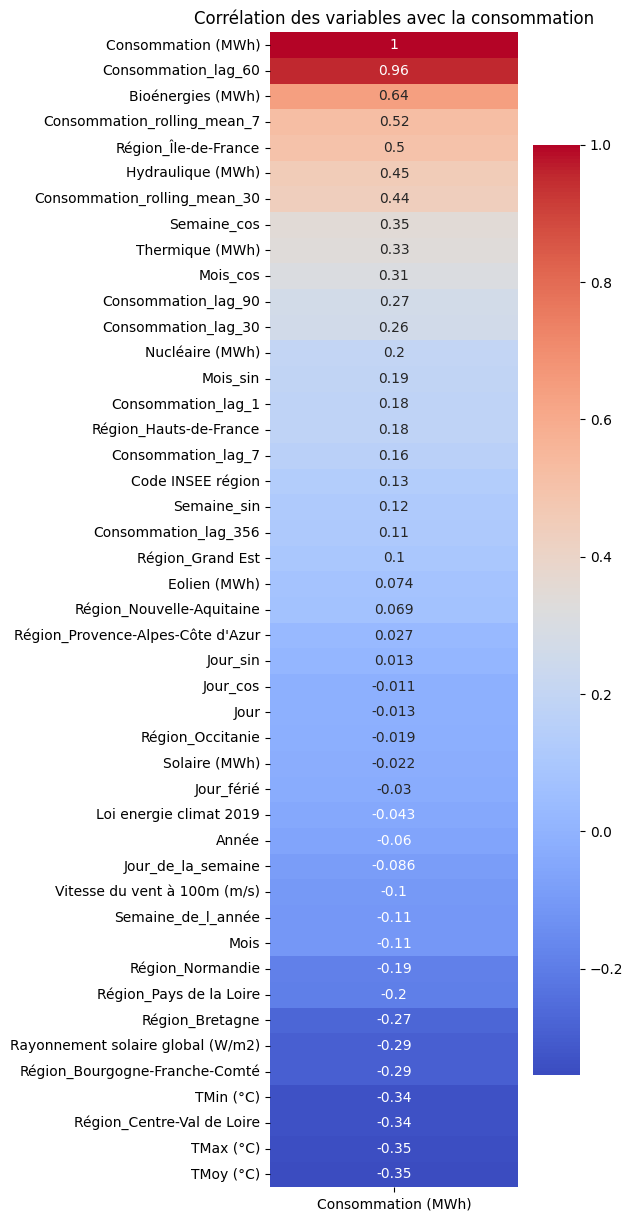

In [9]:
# Matrice de corrélation

plt.figure(figsize=(4, 15))
sns.heatmap(correlation_matrix[['Consommation (MWh)']].sort_values(by='Consommation (MWh)', ascending=False), annot=True, cmap="coolwarm")
plt.title("Corrélation des variables avec la consommation")
plt.show()

#Modèle DL : LSTM


Vérification des données X brut:
Shape: (33564, 8)
Contains NaN: True
Min value: nan
Max value: nan

Vérification des données y brut:
Shape: (33564,)
Contains NaN: False
Min value: 4356.75
Max value: 328445.0

Vérification des données X scaled:
Shape: (33564, 8)
Contains NaN: False
Min value: 0.0
Max value: 1.0

Vérification des données y scaled:
Shape: (33564,)
Contains NaN: False
Min value: 0.0
Max value: 1.0

Vérification des données Séquences X:
Shape: (33559, 5, 8)
Contains NaN: False
Min value: 0.0
Max value: 1.0

Vérification des données Séquences y:
Shape: (33559,)
Contains NaN: False
Min value: 0.0
Max value: 1.0
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0978 - val_loss: 0.0333
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0332 - val_loss: 0.0225
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0245 - val_loss: 0.0220
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0233 - val_loss: 0.0210
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0219 - val_loss: 0.0202
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - val_loss: 0.0191
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192 - val_loss: 0.0181
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179 - val_loss: 0.0173
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167 - val_loss: 0.0165
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0157
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - val_loss: 0.0153
Epoch 12/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.

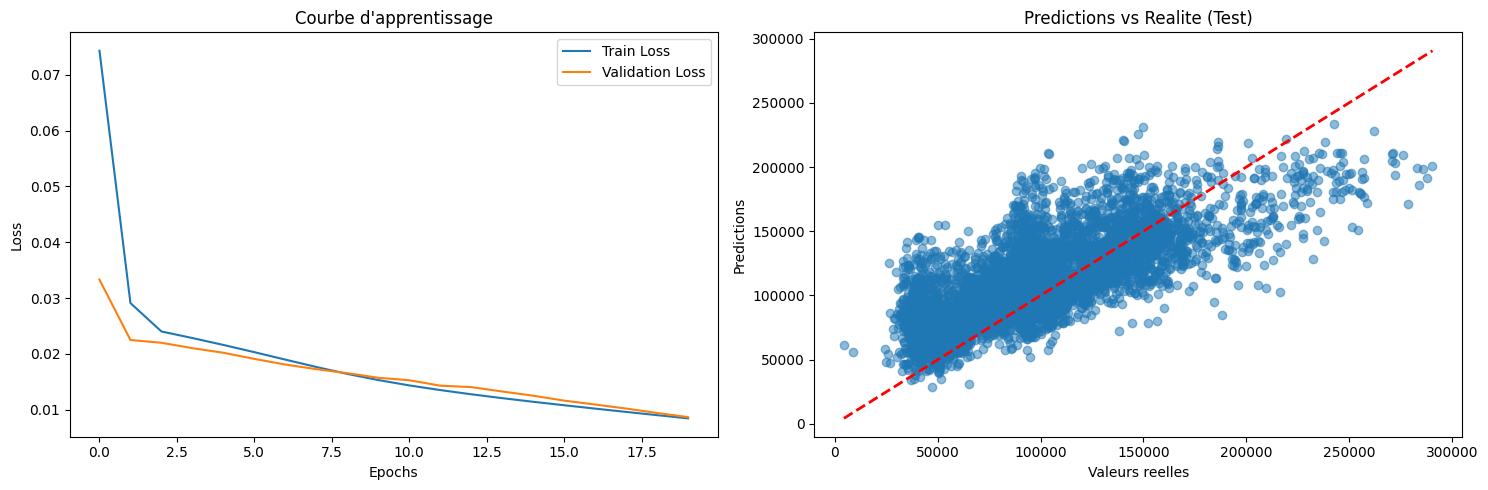

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Changement pour MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Configuration de TensorFlow pour plus de stabilité numérique
tf.keras.backend.set_floatx('float64')

# Vérification des données avant traitement
def check_data(data, name):
    print(f"\nVérification des données {name}:")
    print(f"Shape: {data.shape}")
    print(f"Contains NaN: {np.isnan(data).any()}")
    print(f"Min value: {np.min(data)}")
    print(f"Max value: {np.max(data)}")

# Fonction simplifiée pour créer des séquences
def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Préparation des données
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Sélection des variables
X = df_1[['Consommation_lag_1', 'Consommation_lag_7',
          'TMoy (°C)', 'Consommation_rolling_mean_7', 'Thermique (MWh)', 'Solaire (MWh)', 'Hydraulique (MWh)','Bioénergies (MWh)']]
y = df_1['Consommation (MWh)']

# Vérification des données brutes
check_data(X, "X brut")
check_data(y, "y brut")


# Normalisation avec MinMaxScaler (plus stable que StandardScaler)
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Vérification après scaling
check_data(X_scaled, "X scaled")
check_data(y_scaled, "y scaled")

# Paramètres de séquence
sequence_length = 5

# Création des séquences
X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, sequence_length)

# Vérification des séquences
check_data(X_sequences, "Séquences X")
check_data(y_sequences, "Séquences y")

# Split des données
train_size = int(len(X_sequences) * 0.7)
val_size = int(len(X_sequences) * 0.15)

X_train = X_sequences[:train_size]
y_train = y_sequences[:train_size]
X_val = X_sequences[train_size:train_size+val_size]
y_val = y_sequences[train_size:train_size+val_size]
X_test = X_sequences[train_size+val_size:]
y_test = y_sequences[train_size+val_size:]

# Modèle très simple
model = Sequential([
    LSTM(8, activation='tanh', input_shape=(sequence_length, X.shape[1])),
    Dense(1, activation='linear')
])

# Compilation avec un optimiseur très conservateur
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mse')

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    min_delta=0.0001
)

# Entraînement avec des paramètres très conservateurs
try:
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=128,
        callbacks=[early_stopping],
        verbose=1
    )
except Exception as e:
    print(f"Erreur pendant l'entraînement: {e}")
    raise

# Prédictions
y_train_pred = model.predict(X_train, batch_size=128)
y_val_pred = model.predict(X_val, batch_size=128)
y_test_pred = model.predict(X_test, batch_size=128)

# Inverse transformation
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_val_pred = scaler_y.inverse_transform(y_val_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)

y_train_real = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_val_real = scaler_y.inverse_transform(y_val.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Métriques
print("\nMétriques finales:")
print(f"R² Train: {r2_score(y_train_real, y_train_pred):.4f}")
print(f"R² Validation: {r2_score(y_val_real, y_val_pred):.4f}")
print(f"R² Test: {r2_score(y_test_real, y_test_pred):.4f}")

# Visualisation
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Courbe d'apprentissage")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_real, y_test_pred, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.title('Predictions vs Realite (Test)')
plt.xlabel('Valeurs reelles')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()

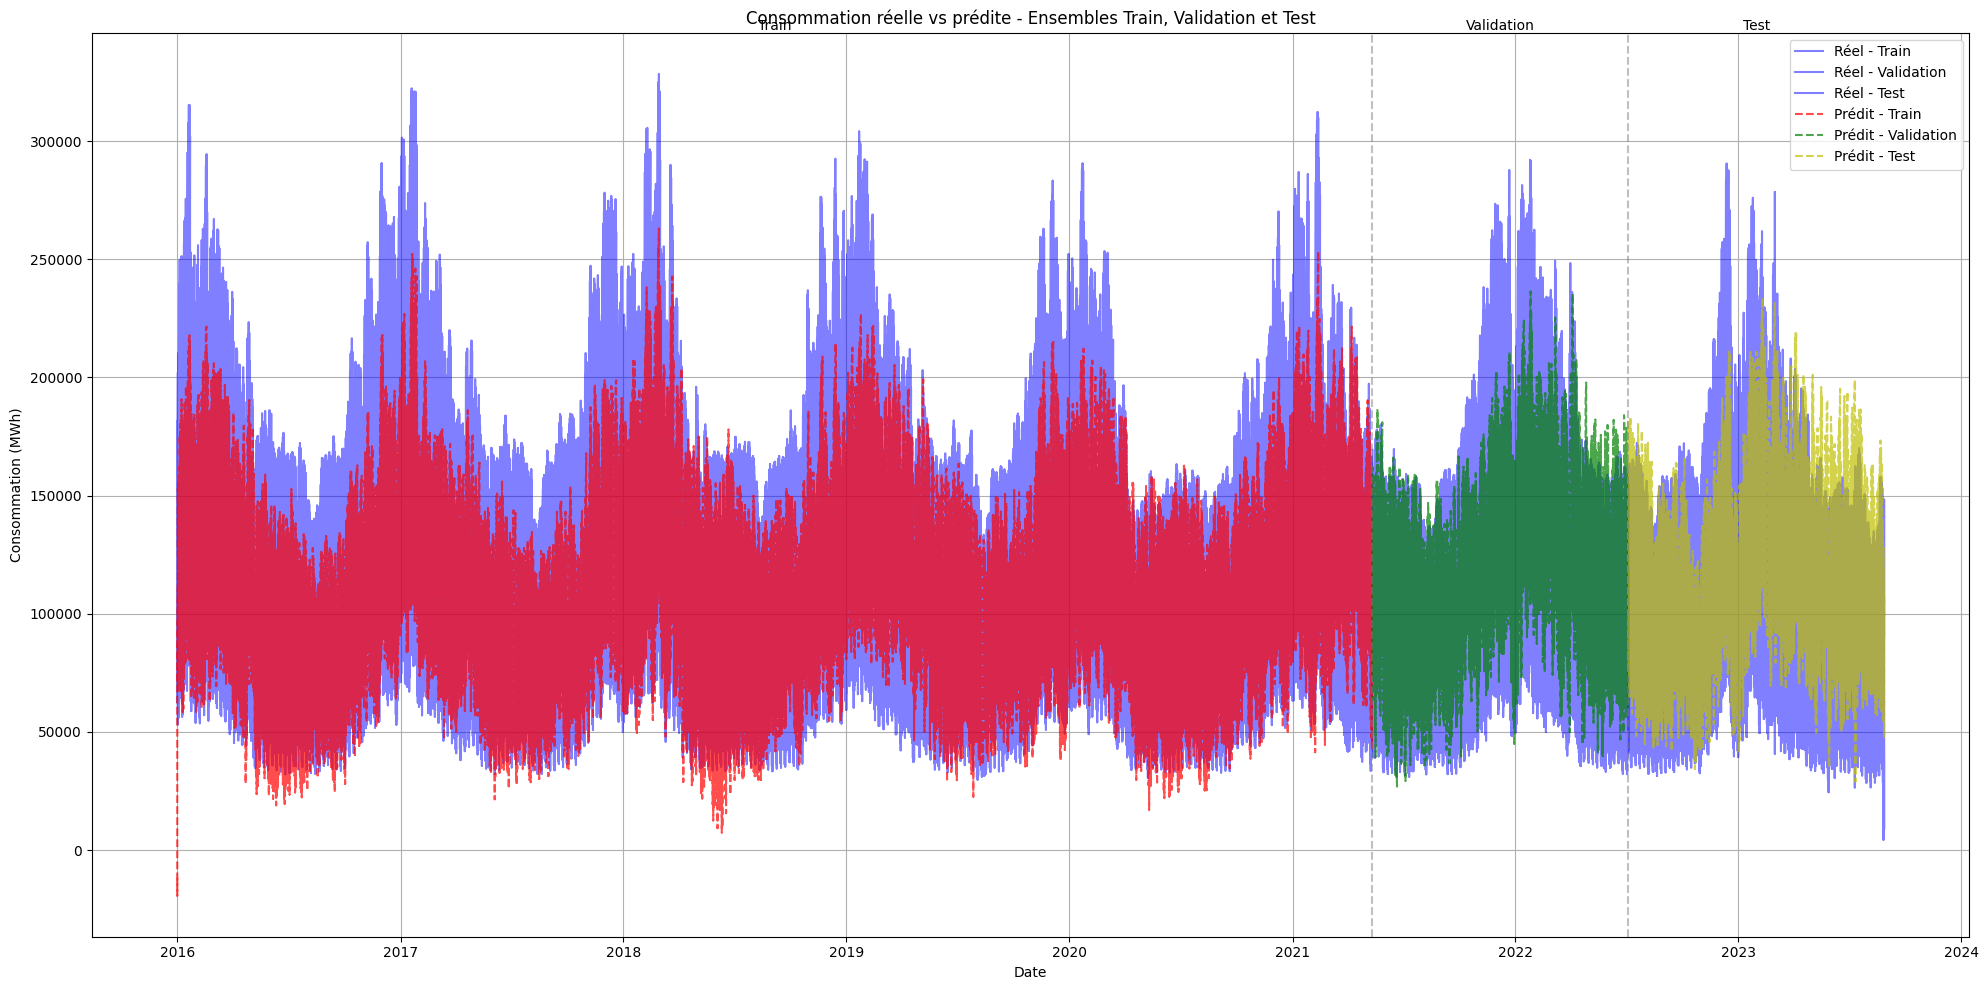

In [25]:
# Création des indices temporels pour chaque ensemble
train_dates = df_1['Date'].iloc[sequence_length:train_size+sequence_length]
val_dates = df_1['Date'].iloc[train_size+sequence_length:train_size+val_size+sequence_length]
test_dates = df_1['Date'].iloc[train_size+val_size+sequence_length:]

# Création d'un seul graphique
plt.figure(figsize=(20, 10))

# Tracer les données réelles
plt.plot(train_dates, y_train_real, 'b-', label='Réel - Train', alpha=0.5)
plt.plot(val_dates, y_val_real, 'b-', label='Réel - Validation', alpha=0.5)
plt.plot(test_dates, y_test_real, 'b-', label='Réel - Test', alpha=0.5)

# Tracer les prédictions
plt.plot(train_dates, y_train_pred, 'r--', label='Prédit - Train', alpha=0.7)
plt.plot(val_dates, y_val_pred, 'g--', label='Prédit - Validation', alpha=0.7)
plt.plot(test_dates, y_test_pred, 'y--', label='Prédit - Test', alpha=0.7)

# Ajouter des lignes verticales pour séparer les ensembles
plt.axvline(x=train_dates.iloc[-1], color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=val_dates.iloc[-1], color='gray', linestyle='--', alpha=0.5)

# Ajouter des annotations pour les ensembles
plt.text(train_dates.iloc[len(train_dates)//2], plt.ylim()[1], 'Train',
         horizontalalignment='center', verticalalignment='bottom')
plt.text(val_dates.iloc[len(val_dates)//2], plt.ylim()[1], 'Validation',
         horizontalalignment='center', verticalalignment='bottom')
plt.text(test_dates.iloc[len(test_dates)//2], plt.ylim()[1], 'Test',
         horizontalalignment='center', verticalalignment='bottom')

plt.title('Consommation réelle vs prédite - Ensembles Train, Validation et Test')
plt.xlabel('Date')
plt.ylabel('Consommation (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

